In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from metpy.plots import USCOUNTIES
import geopandas
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, date
from dateutil import tz
import glob

%matplotlib inline

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


In [2]:
hazards = geopandas.read_file('data/current_hazards.shp')

In [3]:
# Set Coordinate Reference System for the map
map_crs = ccrs.Mercator()

# Set Coordinate Reference System from the Shapefile Data
data_crs = ccrs.PlateCarree()

In [4]:
# Set colors
warning_cmap = {'Winter Storm Watch': '#4682B4',
                'Winter Storm Warning': '#FF69B4',
                'Ice Storm Warning': '#8B008B',
                'Blizzard Watch': '#ADFF2F',
                'Blizzard Warning': '#FF4500'}

# Generate legend patches
legend_patches = []
for wwa in warning_cmap.keys():
   patch = mpatches.Patch(color=warning_cmap[wwa], label=wwa)
   legend_patches.append(patch)

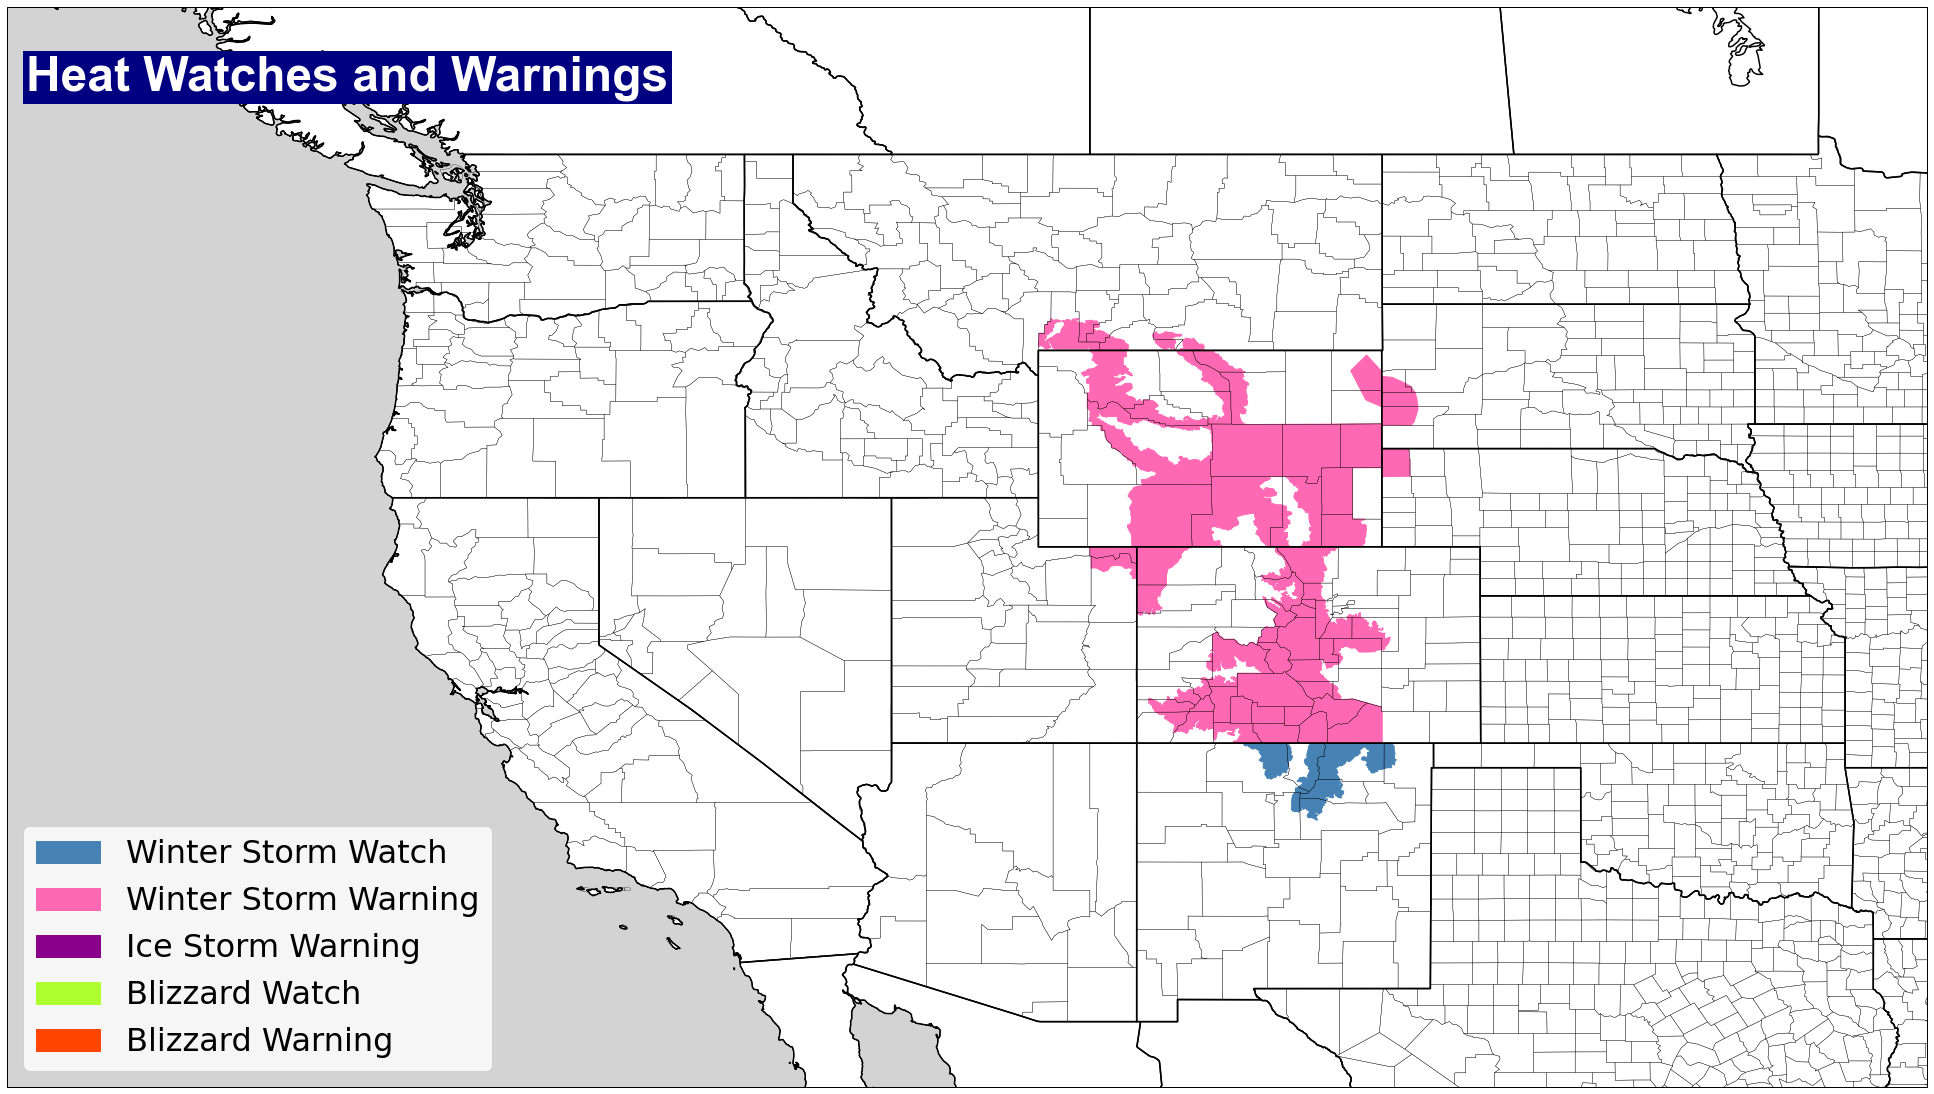

In [5]:
# Setup matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=data_crs)

ax.set_extent([-89, -75, 23, 37], data_crs)
ax.set_extent([-130, -95, 30, 52], data_crs)
ax.set_adjustable('datalim')

#FL
#ax.set_extent([-92, -77, 24.5, 31.5], ccrs.PlateCarree())
#ax.set_extent([-89, -80, 28.5, 31.5], ccrs.PlateCarree())

#SC
#ax.set_extent([-85, -78, 31.5, 35.5], ccrs.PlateCarree())

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black', zorder=5, linewidth=0.3)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.5,)

for key in warning_cmap.keys():
    geometries = hazards[hazards['PROD_TYPE'] == key]
    ax.add_geometries(geometries['geometry'], crs=data_crs, facecolor=warning_cmap[key],
                      edgecolor=warning_cmap[key], linewidth=1, zorder=1, alpha=1.0)
    
# Plot the legend
plt.legend(handles=legend_patches, fontsize=32, loc='lower left',)

# Set title
ax.set_title(f'Heat Watches and Warnings', loc='left', 
             ha='left', va='top', fontsize=48, color='white', 
             fontweight='bold', fontname='Arial', y=0.95, x=0.01, zorder=11,
             bbox=dict(facecolor='navy', alpha=1.0, edgecolor='none'))

graphics_dir = Path('.') / '..' / '..' / 'graphics' / 'hazards'
plt.savefig(f'{graphics_dir}/winter_storm.png', dpi=72)